<h2 align=center>Analyze Worldwide Box Office Data with Seaborn and Python (Part 1)</h2>
<img src="Downloads/DS.py/Coursera/box ofc/revenue.png">

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import json
import ast
from urllib.request import urlopen
from PIL import Image
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tareqspark/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 1: Data Loading and Exploration

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


### Task 2: Visualizing the Target Distribution

<AxesSubplot:>

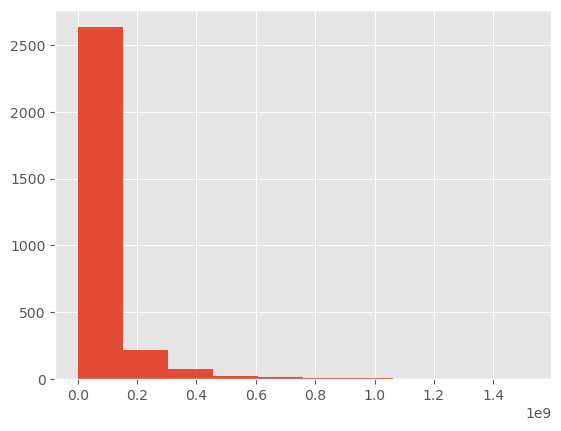

In [4]:
train.revenue.hist()

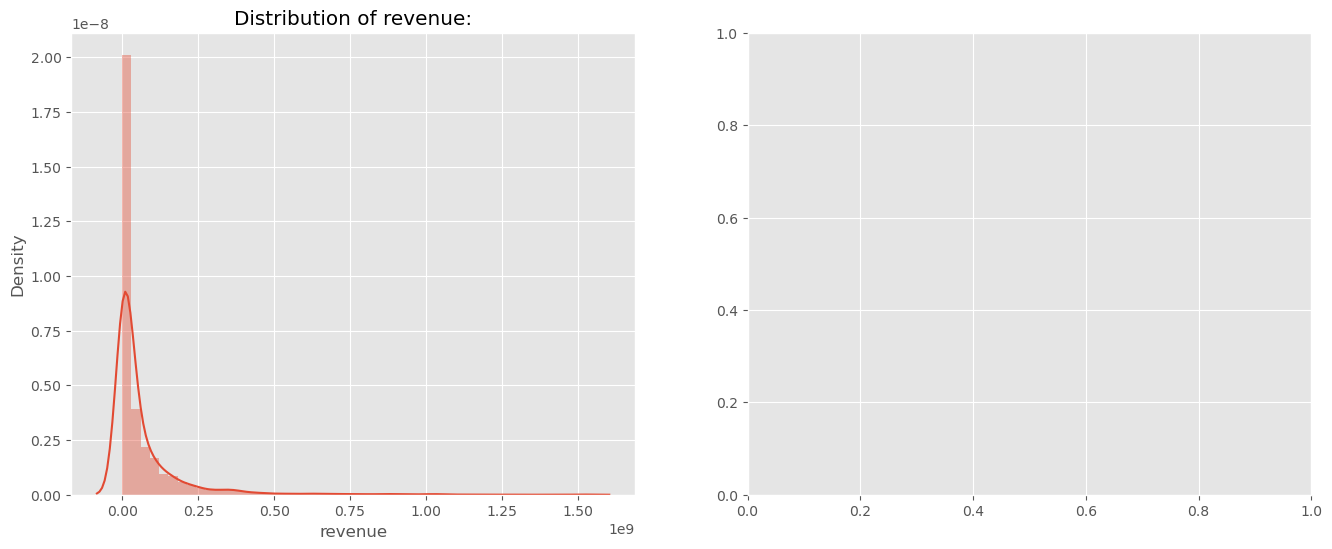

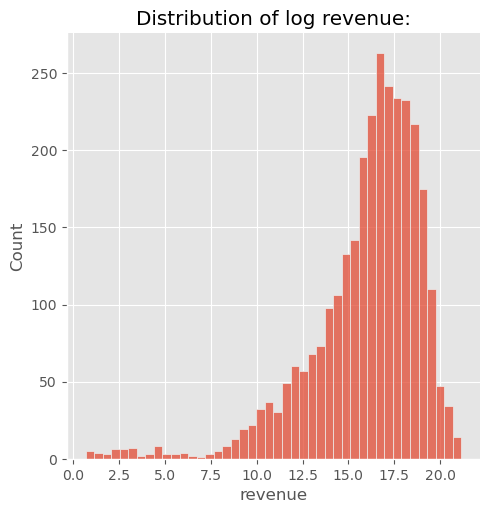

In [5]:
fig, ax= plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(train["revenue"])
plt.title("Distribution of revenue:")
plt.subplot(1,2,2)
sns.displot(np.log1p(train["revenue"]))
plt.title("Distribution of log revenue:");

In [6]:
train['log_revenue'] = np.log1p(train['revenue'])

### Task 3: Relationship between Film Revenue and Budget

<AxesSubplot:xlabel='budget', ylabel='revenue'>

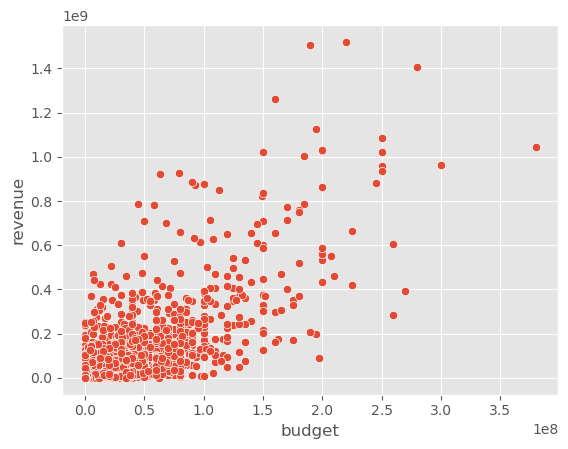

In [7]:
sns.scatterplot(train["budget"],train["revenue"])

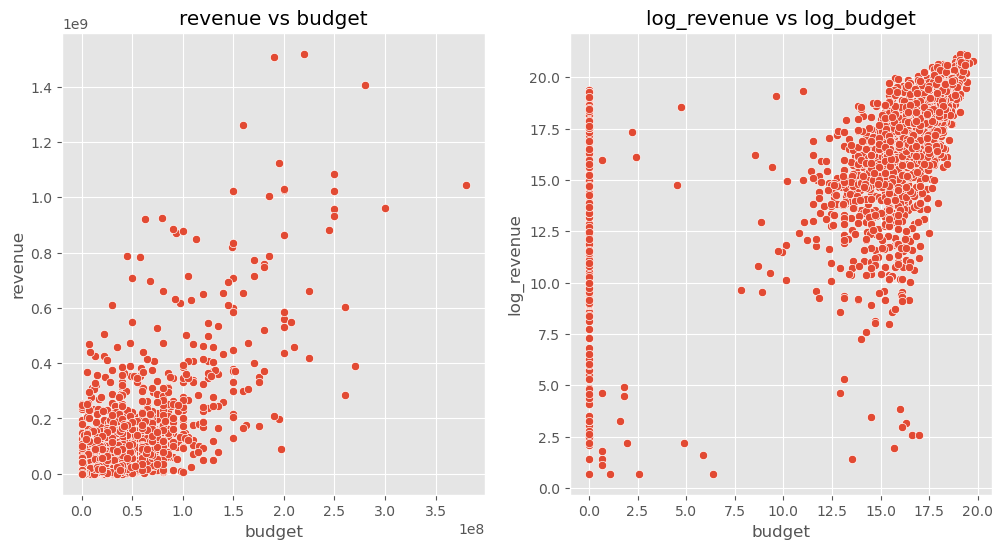

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.scatterplot(train["budget"],train["revenue"])
plt.title("revenue vs budget");
plt.subplot(1,2,2)
sns.scatterplot(np.log1p(train["budget"]), train["log_revenue"])
plt.title("log_revenue vs log_budget");


In [9]:
train["log_budget"]=np.log1p(train["budget"])
test["log_budget"]=np.log1p(test["budget"])

### Task 4: Does having an Official Homepage Affect Revenue?

In [10]:
train["homepage"].value_counts().sum()

946

In [11]:
train["homepage"].value_counts().head(10)

http://www.transformersmovie.com/                      4
http://www.thehobbit.com/                              2
http://www.lordoftherings.net/                         2
http://sonyclassics.com/whiplash/                      1
https://www.facebook.com/thefinesthoursmovie           1
http://sonyclassics.com/pariscanwait/                  1
http://www.maxpaynethemovie.com                        1
http://www.sonypictures.com/movies/afewgoodmen/        1
http://www.theasylum.cc/product.php?id=203             1
http://www.miramax.com/movie/the-cider-house-rules/    1
Name: homepage, dtype: int64

In [12]:
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1 
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

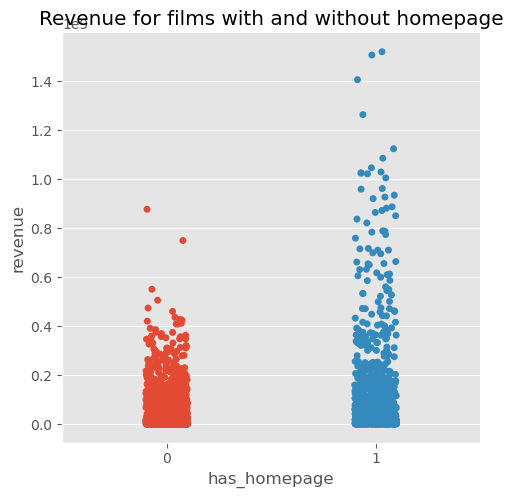

In [13]:
sns.catplot(x="has_homepage", y= "revenue", data=train)
plt.title('Revenue for films with and without homepage');

### Task 5: Distribution of Languages in Film

In [14]:
language_data= train.loc[train["original_language"].isin(train["original_language"].value_counts().head(10).index)]

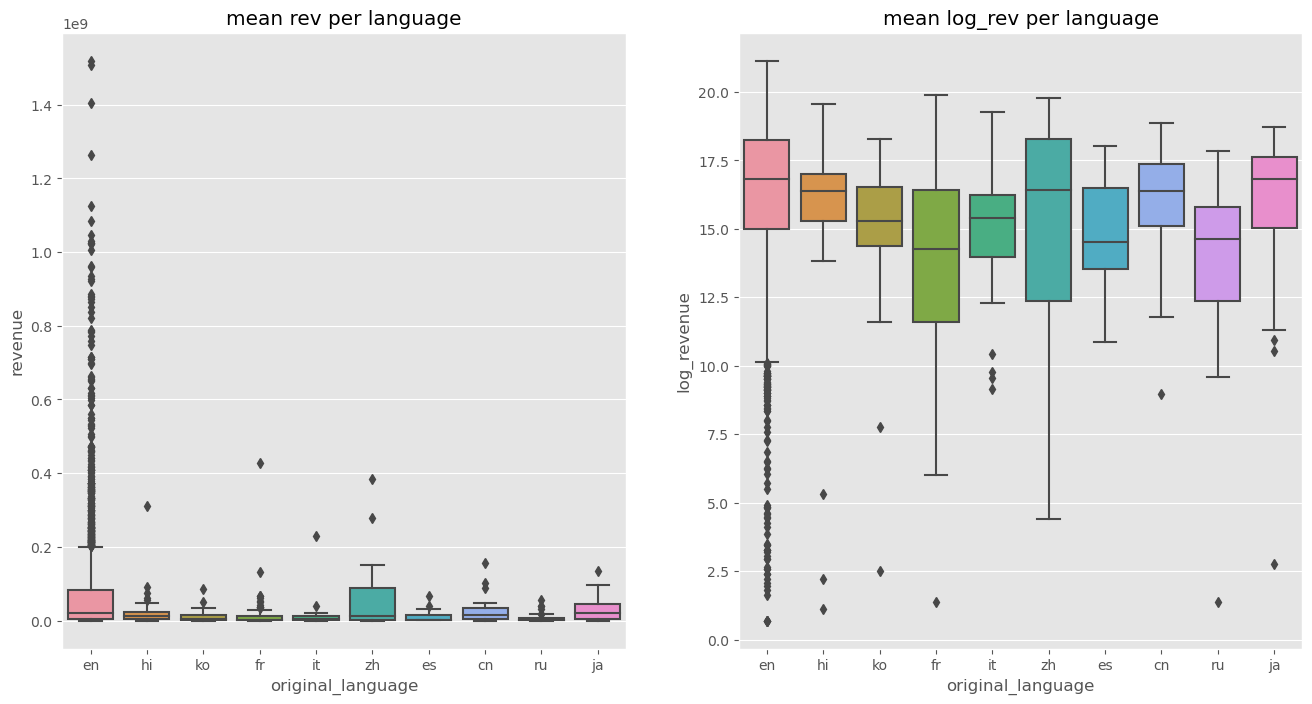

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(x="original_language",y="revenue", data=language_data);
plt.title("mean rev per language")
plt.subplot(1,2,2)
sns.boxplot(x="original_language",y="log_revenue", data=language_data);
plt.title("mean log_rev per language");

### Task 6: Frequent Words in Film Titles and Descriptions

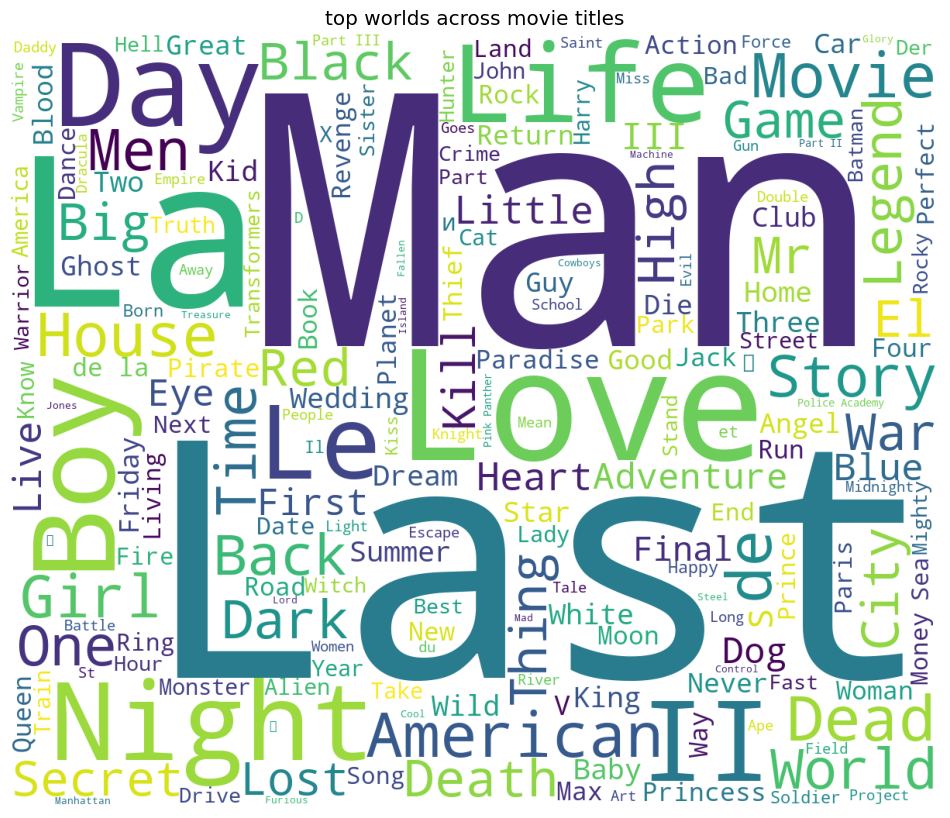

In [16]:
plt.figure(figsize=(12,12))
text= ' '.join(train["original_title"].values)
wordcloud = WordCloud(max_font_size=None,
                     background_color="white",
                     width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title("top worlds across movie titles")
plt.axis("off")
plt.show()

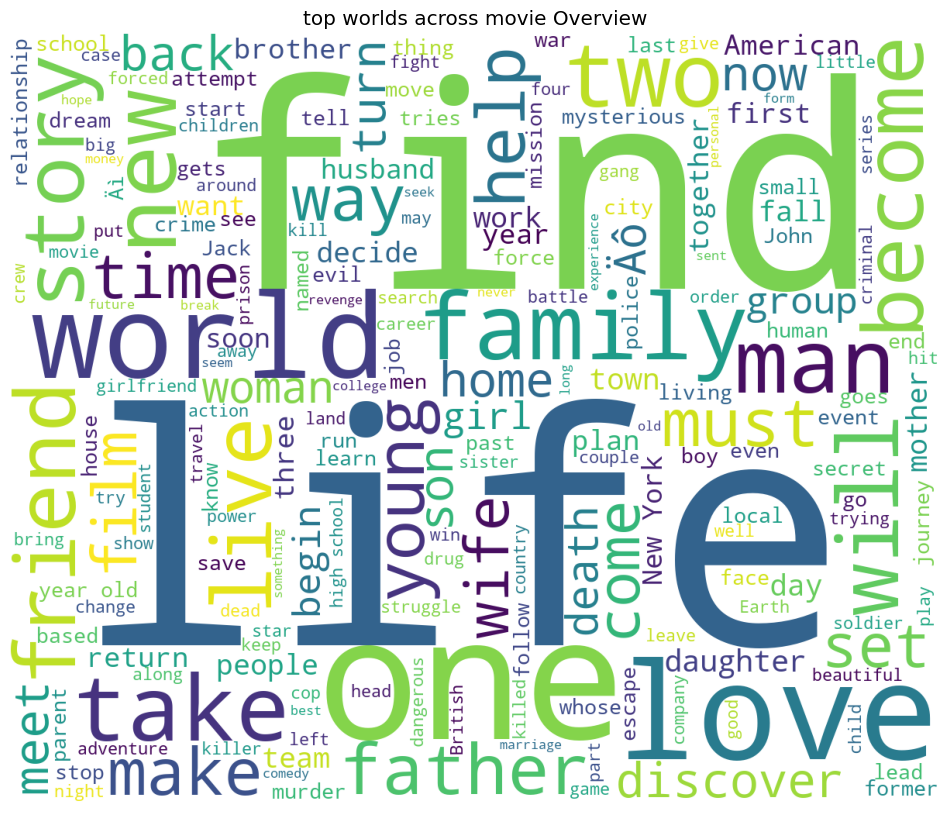

In [17]:
plt.figure(figsize=(12,12))
text= ' '.join(train["overview"].fillna('').values)
wordcloud = WordCloud(max_font_size=None,
                     background_color="white",
                     width=1200,height=1000).generate(text)
plt.imshow(wordcloud)
plt.title("top worlds across movie Overview")
plt.axis("off")
plt.show()

### Task 7: Do Film Descriptions Impact Revenue?

In [20]:
import eli5
from sklearn.linear_model import LinearRegression

2023-02-19 00:48:29.922431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1, 2),
    min_df=5
)
overview_text= vectorizer.fit_transform(train["overview"].fillna(" "))
linreg= LinearRegression()
linreg.fit(overview_text , train["log_revenue"])
eli5.show_weights(linreg,vec=vectorizer,top=20,feature_filter=lambda x: x!="<BIAS>")